# Escalamiento de datos numéricos

### Transformaciones lineales

In [17]:
#Importamos las librerías necesarias
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

En esta primera parte del código lo que hacemos es realizar la normalización de los datos.
- Primero lo hacemos con la normalización min-max, con sus formulas determinadas (Más adecuado para datos uniformemente distribuidos)
- Segundo lo hacemos a través de la normalización Z-Score, con sus fórmulas (Más adecuados para datos distribuidos como campana de Gauss)

Por último, lo que se hace es una representación gráfica de todos los modelos para ver cómo ha quedado.

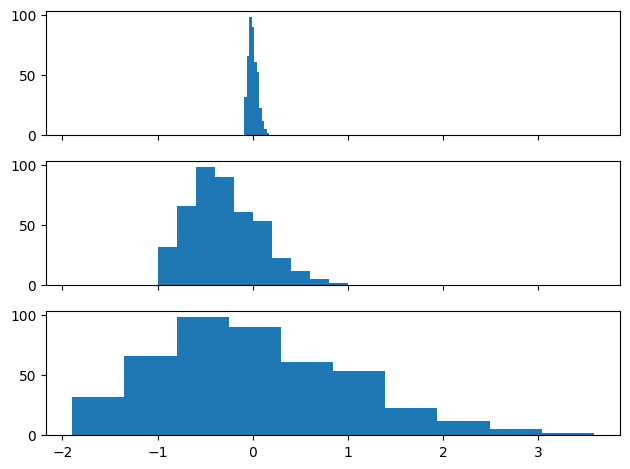

In [6]:
#Vamos a normalizar los datos de distintas maneras, la primera es la más simple, la normalización min-max
# escalamiento max-min
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)

# normalización Z-score

avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std

fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True)

axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)
plt.show()

En esta segunda parte, una vez sabiendo cómo se distribuyen los datos de una manera aproximdada, deberíamos de elegir cuál se adecúa más a nuestro caso en particular, y a entrenar a un modelo de machine learning.
Los modelos que vamos a usar en este momento van a ser de regresiones lineales, por lo que se definen tres modelos para cada uno de nuestros conjuntos de datos.

In [7]:
# modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

Una vez que tenemos los modelos definidos, lo que vamos a hacer es usar la biblioteca timeit, para medir cuánto tarda en entrenarse el modelo con cada uno de los conjuntos de datos.

In [8]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)
z_scaled_time = timeit.timeit(train_z_scaled, number = 100)
print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.13165029999800026 
trainning time for scaled data : 0.10576360000413842
trainning time for z_scaled data : 0.07891089998884127


Como podemos ver, cuanto mejor se procesen los datos antes de pasar un modelo por ellos, más rápido actuará dicho entrenamiento.

* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

### Transformaciones no lineales

Recordemos que las transformaciones no lineales se hacen para los conjuntos de datos que están fuertemente sesgados, como es el caso de los precios de los coches en el csv cars.csv.

In [10]:
df = pd.read_csv('cars.csv')

<Axes: >

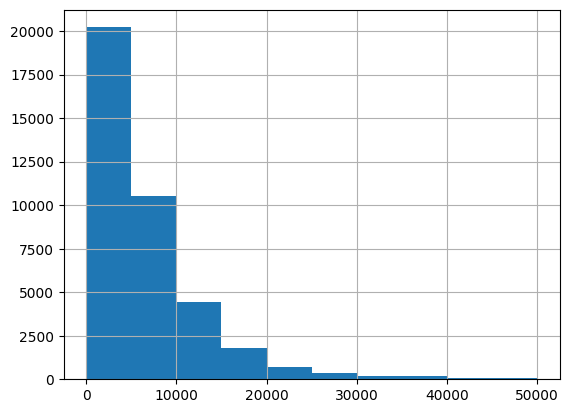

In [11]:
df.price_usd.hist()

Transformación con $$tanh(x)$$

Vamos a usar este modelo para normalizar los datos

<Axes: >

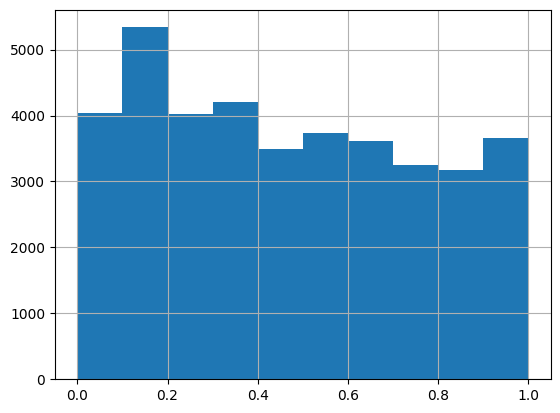

In [16]:
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

* mapear datos a una distribucion gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

In [ ]:
#Determinamos el número de muestras, etamño de fuente y número de contenendores que queremos que se muestren en la gráfica
numero_muestras = 1000
tamaño_fuente = 6
contenedores = 100

rng = np.random.RandomState(42) #Creamos una serie de números aleatorios, pero que siempre serán los mismos para que los resultados sean reproducibles
bc = PowerTransformer(method="box-cox") #Creamos un objeto de la clase PowerTransformer, que nos permite aplicar la transformación de Box-Cox
